Importing required libraries

In [1]:
import gym
import numpy as np
import random

Creating the Environment

In [2]:
env = gym.make("Taxi-v3")
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



Hyperparameters

In [3]:
total_episodes = 50000
total_test_episodes = 100

Reinforcement Learning

In [4]:
env.reset()
total_epochs = []
total_penalties = []
total_reward = []
frames = []

for episode in range(total_test_episodes):
    state = env.reset
    step = 0
    done = False
    epochs, penalties, rewards = 0, 0, 0
    
    while not done:
        action = env.action_space.sample()
        
        new_state, reward, done, info = env.step(action)
        
        if reward == -10:
            penalties += 1
        
        epochs += 1
        
        total_reward.append(reward)
        
        frames.append({'episode':episode,'frames':env.render(mode='ansi'),'state':state,'action':action,'reward':reward})
        
        state = new_state
    total_penalties.append(penalties)
    total_epochs.append(epochs)

Visualization

In [5]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        
        if i == total_test_episodes:
            break
            
        print(f"Episode: {frame['episode']}")
        print(frame['frames'])
        print(f"Timestep: {i+1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(0.1)
        
print_frames(frames)
            

Episode: 0
+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

Timestep: 100
State: 217
Action: 4
Reward: -10


In [6]:
print(f"Results after {total_test_episodes} episode:")
print(f"Average timesteps per episode: {sum(total_epochs)/total_test_episodes}")
print(f"Average reward per timesteps: {sum(total_reward)/sum(total_epochs)}")
print(f"Average penalties per episode: {sum(total_penalties)/total_test_episodes}")
print(f"Total Reward: {sum(total_reward)/total_test_episodes}")

Results after 100 episode:
Average timesteps per episode: 2.99
Average reward per timesteps: -3.82943143812709
Average penalties per episode: 0.94
Total Reward: -11.45


In [7]:
avg_ts_nrl = sum(total_epochs)/total_test_episodes
avg_reward_nrl = sum(total_reward)/sum(total_epochs)
avg_penalties_nrl = sum(total_penalties)/total_test_episodes

# Q Learning 

In [8]:
max_steps = 99  #Maximum steps for each episode
learning_rate = 0.7
gamma = 0.1

epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.01

In [9]:
action_size = env.action_space.n
print("action size = ", action_size)

state_size = env.observation_space.n
print("state size = ", state_size)


action size =  6
state size =  500


In [10]:
qtable = np.zeros((state_size,action_size))
print(qtable)
print(qtable.shape)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
(500, 6)


In [11]:
for episode in range(total_episodes):
    state = env.reset()
    step = 0
    done = False
    
    for step in range(max_steps):
        exp_exp_tradeoff = random.uniform(0,1)
        
        if exp_exp_tradeoff>epsilon:
            action = np.argmax(qtable[state,:])
            
        else:
            action = env.action_space.sample()
            
        new_state,reward,done,info = env.step(action)
        
        qtable[state,action] = qtable[state,action] + learning_rate*(reward+gamma*(np.max(qtable[new_state,:])) - qtable[state,action])
        
        state = new_state
        
        if done == True:
            break
            
        epsilon = min_epsilon+(max_epsilon-min_epsilon)*np.exp(-decay_rate*episode)

In [12]:
qtable

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [ -1.11111111,  -1.11111111,  -1.11111111,  -1.11111111,
         -1.11111109, -10.11090406],
       [ -1.11110884,  -1.11108985,  -1.11110899,  -1.11108977,
         -1.1109    , -10.110409  ],
       ...,
       [ -1.11000692,  -1.109     ,  -1.10944103,  -1.10962872,
         -9.80761964,  -7.        ],
       [ -1.11111093,  -1.11111084,  -1.11111096,  -1.11111088,
         -9.7937    ,  -7.        ],
       [ -0.959     ,  -0.91      ,  -0.973     ,   0.99999999,
         -9.149     ,  -9.1       ]])

In [13]:
env.reset()
total_epochs = []
total_penalties = []
total_reward = []
frames = []

for episode in range(total_test_episodes):
    state = env.reset()
    step = 0
    done = False
    epochs, penalties, rewards = 0, 0, 0
    
    while not done:
        action = np.argmax(qtable[state,:])
        
        new_state, reward, done, info = env.step(action)
        
        if reward == -10:
            penalties += 1
        
        epochs += 1
        
        total_reward.append(reward)
        
        frames.append({'episode':episode,'frames':env.render(mode='ansi'),'state':state,'action':action,'reward':reward})
        
        state = new_state
    total_penalties.append(penalties)
    total_epochs.append(epochs)

In [14]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        
        if frame['episode'] == total_test_episodes:
            break
            
        print(f"Episode: {frame['episode']}")
        print(frame['frames'])
        print(f"Timestep: {i+1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(0)
        
print_frames(frames)

Episode: 99
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 1271
State: 479
Action: 5
Reward: 20


In [15]:
print(f"Results after {total_test_episodes} episode:")
print(f"Average timesteps per episode: {sum(total_epochs)/total_test_episodes}")
print(f"Average reward per timesteps: {sum(total_reward)/sum(total_epochs)}")
print(f"Average penalties per episode: {sum(total_penalties)/total_test_episodes}")
print(f"Total Reward: {sum(total_reward)/total_test_episodes}")

Results after 100 episode:
Average timesteps per episode: 12.71
Average reward per timesteps: 0.6522423288749016
Average penalties per episode: 0.0
Total Reward: 8.29


In [16]:
avg_ts_rl = sum(total_epochs)/total_test_episodes
avg_reward_rl = sum(total_reward)/sum(total_epochs)
avg_penalties_rl = sum(total_penalties)/total_test_episodes

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
models = [("Random agent's prformance", avg_reward_nrl, avg_penalties_nrl,avg_ts_nrl),("Q-Learning agents's performance",avg_reward_rl, avg_penalties_rl,avg_ts_rl)]

In [19]:
Algorithms = pd.DataFrame(data = models, columns=['Model', "Average rewards per move", "Average number of penalties per episode", "Average number of timesteps per trip"])

In [20]:
Algorithms

,Model,Average rewards per move,Average number of penalties per episode,Average number of timesteps per trip
0,Random agent's prformance,-3.829431,0.94,2.99
1,Q-Learning agents's performance,0.652242,0.00,12.71


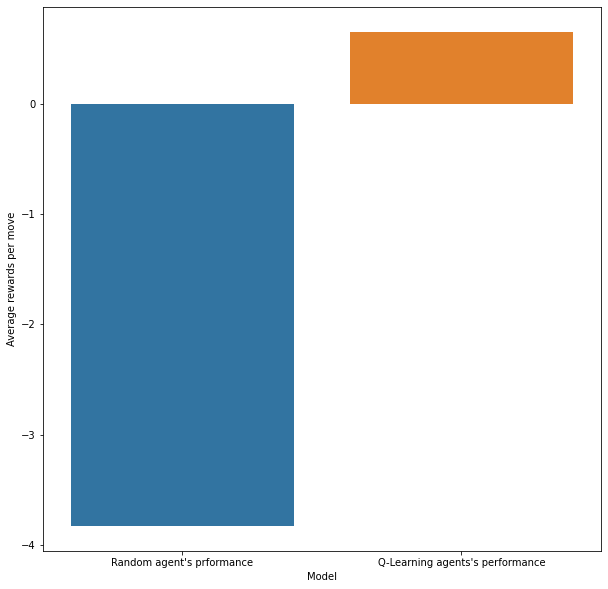

In [21]:
plt.figure(figsize=(10,10))
sns.barplot(x = 'Model', y = 'Average rewards per move', data = Algorithms)
plt.show()

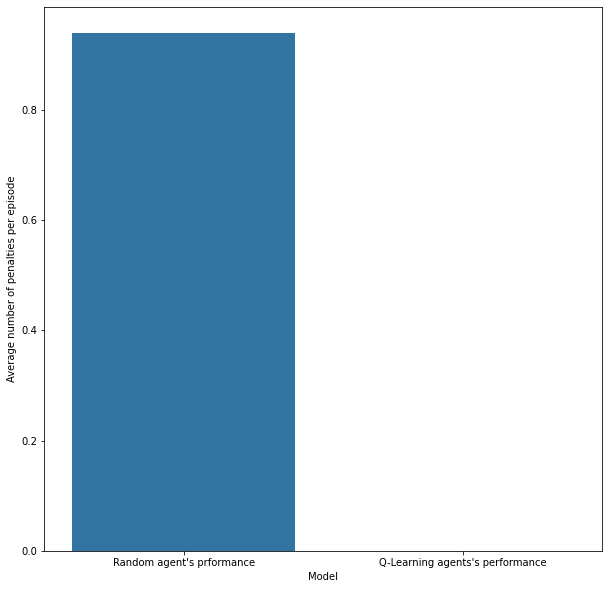

In [22]:
plt.figure(figsize=(10,10))
sns.barplot(x = 'Model', y = 'Average number of penalties per episode', data = Algorithms)
plt.show()

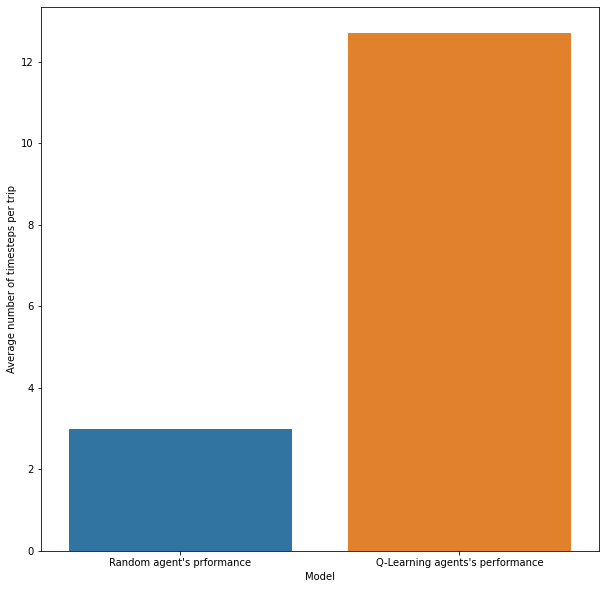

In [23]:
plt.figure(figsize=(10,10))
sns.barplot(x = 'Model', y = 'Average number of timesteps per trip', data = Algorithms)
plt.show()